# Importing the neccessary Packages

In [112]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import the data

In [113]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

# Data Cleaning

In [114]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [115]:
data.shape

(1200, 28)

In [116]:
# looking for the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [117]:
data.isna().values.any() # To find out NaN values

False

In [118]:
data.isnull().values.any() # To find out Null values

False

In [119]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

# Exploratory Data Analysis


# 1.Distribution of the dataset
In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar kdeplot function from the Seaborn plotting library. The distribution has been done by both numerical and categorical features. it will show the overall idea about the density and majority of data present in a different level.

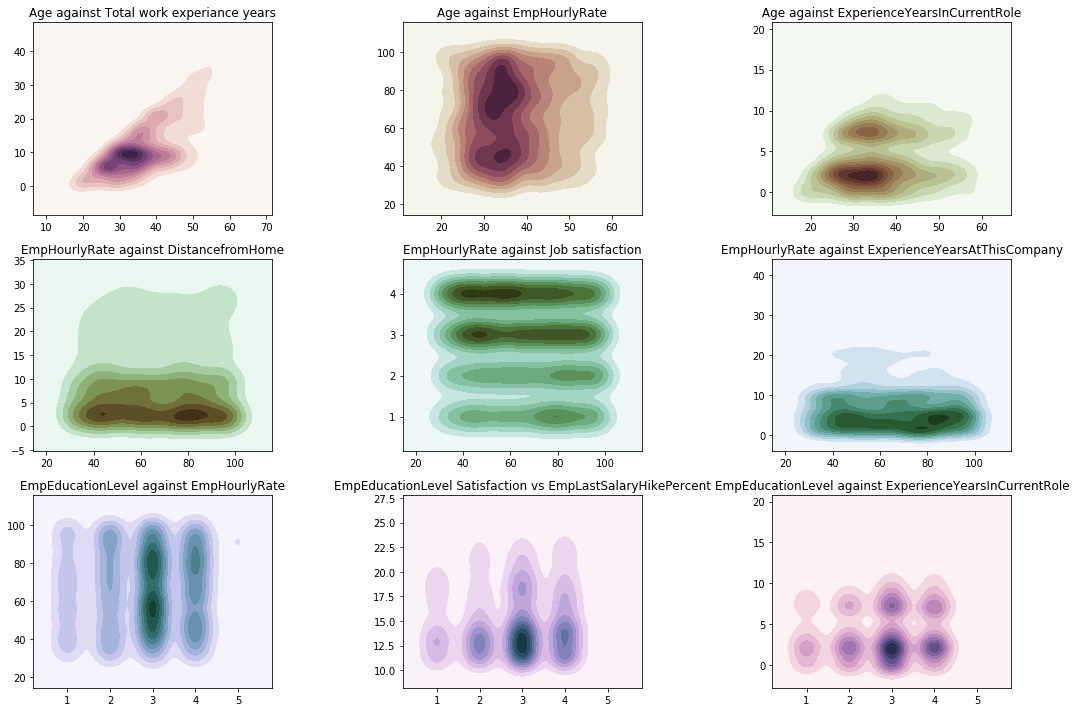

In [120]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sb.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data['Age'].values
y = data['TotalWorkExperienceInYears'].values
sb.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total work experiance years')

cmap = sb.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['Age'].values
y = data['EmpHourlyRate'].values
sb.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against EmpHourlyRate')

cmap = sb.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['Age'].values
y = data['ExperienceYearsInCurrentRole'].values
sb.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = ' Age against ExperienceYearsInCurrentRole ')

cmap = sb.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['DistanceFromHome'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'EmpHourlyRate against DistancefromHome')

cmap = sb.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['EmpJobSatisfaction'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'EmpHourlyRate against Job satisfaction')

cmap = sb.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['ExperienceYearsAtThisCompany'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'EmpHourlyRate against ExperienceYearsAtThisCompany')

cmap = sb.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['EmpHourlyRate'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'EmpEducationLevel against EmpHourlyRate')

cmap = sb.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['EmpLastSalaryHikePercent'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'EmpEducationLevel Satisfaction vs EmpLastSalaryHikePercent')

cmap = sb.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['ExperienceYearsInCurrentRole'].values
sb.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'EmpEducationLevel against ExperienceYearsInCurrentRole')

f.tight_layout()

# Distribution of Numerical Features
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.the distribution can be derived or visualized using the density map between the numerical or categorical features present in the data.

- The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.
- The distance from home to office is distributing from 0 unit to 30 unit which can be kilometre or mile. The most of the employees are coming from the range of 0 to 5 units.
- Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.
- The hourly rate range is 65 to 95 for majority employees work in this company.
- In General, Most of Employees work up to 5 years in this company.
- Most of the employees get 11% to 15% of salary hike in this company.


# Distribution of Categorical Features
- The Gender variance is divided by 60% of Male employees and 40% of Female employees in the company.
- The number of the educational backgrounds present in the employees is six unique backgrounds.
- nineteen unique employee job roles are present in this company.
- The most of the employees are having the education level of 3
- The Job satisfaction level in this company is high level for the majority of employees.
- The 85% of employees are not having attrition in their work
- only 11% of employees in the company were achieved level 4 - performance rating
- The overall percentage of employees doing overtime is 30%


# visualization 

In [121]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# 1.  Feature Selection
- There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1.
- Standardization and Label Encoding was also used for feature transformation.
- A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
- Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [122]:
data.corr()

Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.027306           0.151062   
TrainingTimesLastYear        -0.016053         -0.032082          -0.013674   
EmpWorkLifeBalance           -0.019563         -0.044788           0.010276   
ExperienceYearsAtThisCompany  0.318852          0.021908           0.076332   
ExperienceYearsInCurrentRole  0.217163          0.019898           0.066672   
YearsSinceLastPromotion       0.228199          0.013246           0.054313   
YearsWithCurrManager          0.205098          0.017860           0.088988   
PerformanceRating            -0.040164         -0.046142           0.020529   

                              EmpEnvironmentSatisfaction  EmpHourlyRate  \
Age                                             0.013814       0.062867   
DistanceFromHome                               -0.017719       0.013730   
EmpEducationLevel                              -0.037103       0.014095   
EmpEnvironmentSatisfaction                      1.000000      -0.049501   
EmpHourlyRate                                  -0.049501       1.000000   
EmpJobInvolvement                               0.004865       0.054741   
EmpJobLevel                                    -0.008272      -0.018606   
EmpJobSatisfaction                             -0.004319      -0.066417   
NumCompaniesWorked                              0.017270       0.040484   
EmpLastSalaryHikePercent                       -0.047271      -0.015934   
EmpRelationshipSatisfaction                    -0.010504       0.008783   
TotalWorkExperienceInYears                     -0.012894       0.026034   
TrainingTimesLastYear                           0.001192      -0.024160   
EmpWorkLifeBalance                             -0.000262       0.016189   
ExperienceYearsAtThisCompany                   -0.000561      -0.000399   
ExperienceYearsInCurrentRole                    0.025491      -0.011871   
YearsSinceLastPromotion                         0.010732      -0.010000   
YearsWithCurrManager                           -0.011702      -0.004576   
PerformanceRating                               0.395561      -0.043116   

                              EmpJobInvolvement  EmpJobLevel  \
Age                                    0.027216     0.509139   
DistanceFromHome                       0.003231     0.017270   
EmpEducationLevel                      0.027544     0.100734   
EmpEnvironmentSatisfaction             0.004865    -0.008272   
EmpHourlyRate                          0.054741    -0.018606   
EmpJobInvolvement                      1.000000    -0.034349   
EmpJobLevel                           -0.034349     1.000000   
EmpJobSatisfaction                    -0.005501    -0.011853   
NumCompaniesWorked                     0.018211     0.127477   
EmpLastSalaryHikePercent              -0.001742    -0.020975   
EmpRelationshipSatisfaction            0.018037     0.002992   
TotalWorkExperienceInYears            -0.028851     0.784229   
TrainingTimesLastYear                 -0.025168    -0.000389   
EmpWorkLifeBalance                    -0.014129     0.049

In [123]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

MaritalStatus    EmpDepartment  EmpEducationLevel OverTime  \
0        Single            Sales                  3       No   
1        Single            Sales                  4       No   
2       Married            Sales                  4      Yes   
3      Divorced  Human Resources                  4       No   
4        Single            Sales                  4       No   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  
0                             7                        0  
1                             7                        1  
2                            13                        1  
3                             6                       12  
4                             2                        2

# 2.Department wise performances

In department wise performance, we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise.

In Employee department feature there are six departments available.

- Sales
- Human Resoruces
- Development
- Data Science
- Reserch & Devlopment
- Finace

# Sales Department

In [124]:
sales = data[data.EmpDepartment == 'Sales'] # Slicing the all coloums of Sales Row 
sales.head(3)


EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
0  E1001000   32   Male           Marketing        Single         Sales   
1  E1001006   47   Male           Marketing        Single         Sales   
2  E1001007   40   Male       Life Sciences       Married         Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

In [125]:
sb.countplot(y="PerformanceRating", data=sales, palette="Oranges_d");


# (ii) Performance Rating with respect to Age Group

In [126]:
sb.boxplot(sales['PerformanceRating'], sales['Age'], palette = "Blues_d")

# (iii) Performance based on Gender

In [127]:
sb.barplot(sales['Gender'], sales['PerformanceRating'],palette ="Reds_d")

# (iv) Performance According to the Experience Level

In [128]:
data = [
    {
        'x': sales['TotalWorkExperienceInYears'],
        'y': sales['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':sales['ExperienceYearsAtThisCompany'],
        'y':sales['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': sales['ExperienceYearsInCurrentRole'],
        'y': sales['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Sales',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Human Resources Department

In [129]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [130]:
HR = data[data.EmpDepartment == 'Human Resources'] # Slicing the all coloums of Sales Row 
HR.head(3)

EmpNumber  Age  Gender EducationBackground MaritalStatus    EmpDepartment  \
3   E1001009   41    Male     Human Resources      Divorced  Human Resources   
16  E1001038   39  Female     Human Resources       Married  Human Resources   
58  E1001107   36    Male     Human Resources       Married  Human Resources   

         EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
3           Manager           Travel_Rarely                10   
16  Human Resources           Travel_Rarely                 3   
58  Human Resources           Travel_Rarely                13   

    EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
3                   4  ...                            2   
16                  3  ...                            3   
58                  3  ...                            2   

    TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
3                           23                      2                   2   
16                          12                      3                   1   
58                           8                      2                   3   

    ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
3                             21                             6   
16                             8                             3   
58                             5                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
3                       12                     6         No                  3  
16                       3                     6         No                  3  
58                       0                     4         No                  3  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

In [131]:
sb.countplot(y="PerformanceRating", data=HR, palette="Purples_d");

# (ii) Performance Rating with respect to Age Group

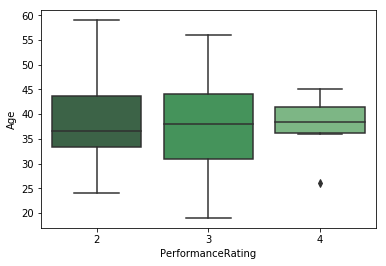

In [132]:
sb.boxplot(HR['PerformanceRating'], HR['Age'],palette="Greens_d")

# (iii) Performance based on Gender

In [133]:
sb.barplot(HR['Gender'], HR['PerformanceRating'],palette="Reds_d")

# (iv) Performance According to the Experience Level

In [134]:
data = [
    {
        'x': HR['TotalWorkExperienceInYears'],
        'y': HR['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':HR['ExperienceYearsAtThisCompany'],
        'y':HR['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': HR['ExperienceYearsInCurrentRole'],
        'y': HR['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - HR ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Development Department

In [135]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [136]:
Development = data[data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row 
Development.head(3)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
5  E1001011   27    Male       Life Sciences      Divorced   Development   
7  E1001019   28  Female       Life Sciences        Single   Development   
8  E1001020   36  Female       Life Sciences       Married   Development   

  EmpJobRole BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
5  Developer       Travel_Frequently                10                  2   
7  Developer           Travel_Rarely                 1                  2   
8  Developer              Non-Travel                 8                  3   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
5  ...                            3                           9   
7  ...                            4                          10   
8  ...                            1                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
5                      4                   2                             9   
7                      4                   3                             7   
8                      2                   3                             8   

   ExperienceYearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
5                             7                       1                     7   
7                             7                       3                     7   
8                             7                       0                     5   

   Attrition  PerformanceRating  
5         No                  4  
7        Yes                  3  
8         No                  3  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

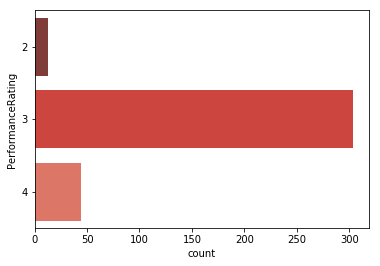

In [137]:
sb.countplot(y="PerformanceRating", data=Development, palette="Reds_d");

# (ii) Performance Rating with respect to Age Group

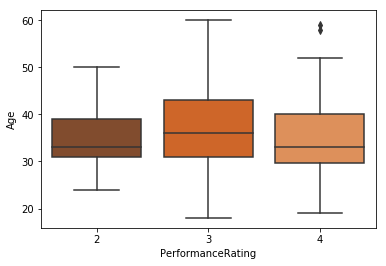

In [138]:
sb.boxplot(Development['PerformanceRating'], Development['Age'],palette="Oranges_d")

# (iii) Performance based on Gender

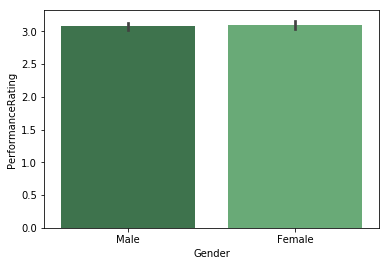

In [139]:
sb.barplot(Development['Gender'], Development['PerformanceRating'],palette="Greens_d")

# (iv) Performance According to the Experience Level

In [140]:
data = [
    {
        'x': Development['TotalWorkExperienceInYears'],
        'y': Development['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Development['ExperienceYearsAtThisCompany'],
        'y':Development['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Development['ExperienceYearsInCurrentRole'],
        'y': Development['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Development ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Data Science Department

In [141]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [142]:
Data_Science = data[data.EmpDepartment == 'Data Science'] # Slicing the all coloums of Sales Row 
Data_Science.head(3)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
89   E1001165   49  Female    Technical Degree       Married  Data Science   
107  E1001201   21  Female               Other        Single  Data Science   
108  E1001202   36    Male       Life Sciences       Married  Data Science   

         EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
89   Data Scientist           Travel_Rarely                 1   
107  Data Scientist           Travel_Rarely                18   
108  Data Scientist           Travel_Rarely                14   

     EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
89                   3  ...                            2   
107                  1  ...                            1   
108                  1  ...                            1   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
89                            7                      2                   3   
107                           1                      3                   2   
108                          17                      2                   2   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
89                              4                             2   
107                             1                             0   
108                            16                             8   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
89                        0                     2         No   
107                       0                     0        Yes   
108                       4                    11         No   

     PerformanceRating  
89                   3  
107                  3  
108                  3  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

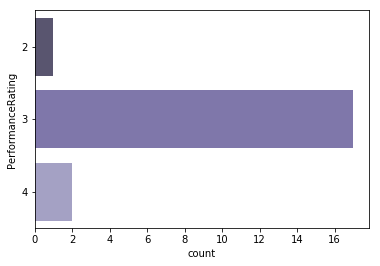

In [143]:
sb.countplot(y="PerformanceRating", data=Data_Science, palette="Purples_d");

# (ii) Performance Rating with respect to Age Group

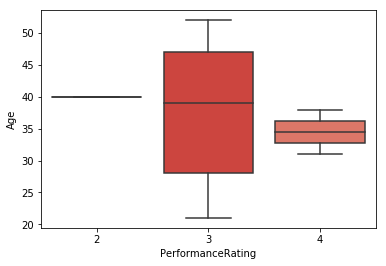

In [144]:
sb.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'],palette="Reds_d")

# (iii) Performance based on Gender

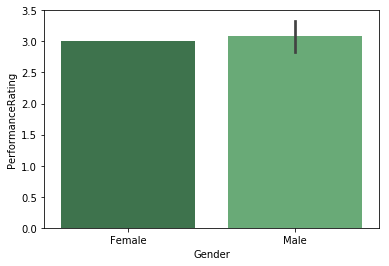

In [145]:
sb.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'],palette="Greens_d")

# (iv) Performance According to the Experience Level

In [146]:
data = [
    {
        'x': Data_Science['TotalWorkExperienceInYears'],
        'y': Data_Science['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Data_Science['ExperienceYearsAtThisCompany'],
        'y':Data_Science['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Data_Science['ExperienceYearsInCurrentRole'],
        'y': Data_Science['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Data Science ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Research & Development Department

In [147]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [148]:
RD = data[data.EmpDepartment == 'Research & Development'] # Slicing the all coloums of Sales Row 
RD.head(3)

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
156  E1001284   38    Male             Medical       Married   
157  E1001288   35    Male               Other      Divorced   
158  E1001289   31  Female       Life Sciences       Married   

              EmpDepartment              EmpJobRole BusinessTravelFrequency  \
156  Research & Development      Senior Manager R&D       Travel_Frequently   
157  Research & Development   Laboratory Technician           Travel_Rarely   
158  Research & Development  Manufacturing Director       Travel_Frequently   

     DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
156                10                  1  ...                            2   
157                14                  4  ...                            4   
158                 1                  1  ...                            3   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
156                           3                      0                   2   
157                           5                      2                   1   
158                           4                      1                   3   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
156                             2                             1   
157                             4                             2   
158                             4                             3   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
156                       0                     2         No   
157                       0                     2        Yes   
158                       0                     3         No   

     PerformanceRating  
156                  3  
157                  3  
158                  3  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

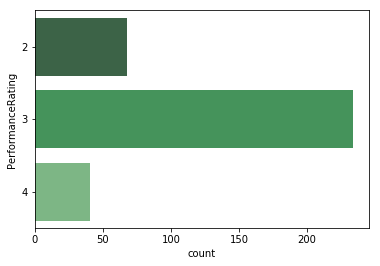

In [149]:
sb.countplot(y="PerformanceRating", data=RD, palette="Greens_d");


# (ii) Performance Rating with respect to Age Group

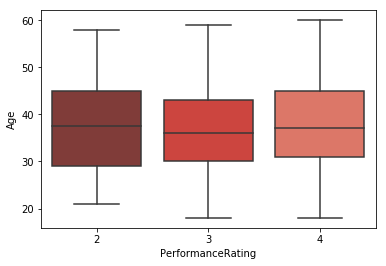

In [150]:
sb.boxplot(RD['PerformanceRating'], RD['Age'],palette="Reds_d")

# (iii) Performance based on Gender

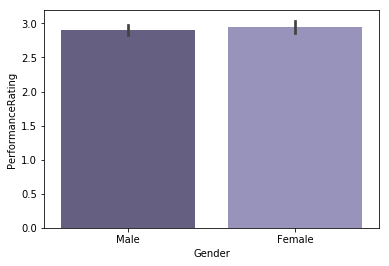

In [151]:
sb.barplot(RD['Gender'], RD['PerformanceRating'],palette="Purples_d")

# (iv) Performance According to the Experience Level

In [152]:
data = [
    {
        'x': RD['TotalWorkExperienceInYears'],
        'y': RD['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':RD['ExperienceYearsAtThisCompany'],
        'y':RD['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': RD['ExperienceYearsInCurrentRole'],
        'y': RD['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - R & D',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# Finance Department

In [153]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [154]:
Finance = data[data.EmpDepartment == 'Finance'] # Slicing the all coloums of Sales Row 
Finance.head(3)

EmpNumber  Age Gender EducationBackground MaritalStatus EmpDepartment  \
482  E1001868   29   Male       Life Sciences      Divorced       Finance   
484  E1001870   23   Male    Technical Degree       Married       Finance   
485  E1001874   35   Male       Life Sciences       Married       Finance   

          EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
482  Finance Manager       Travel_Frequently                 2   
484  Finance Manager           Travel_Rarely                10   
485  Finance Manager           Travel_Rarely                28   

     EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
482                  1  ...                            4   
484                  3  ...                            4   
485                  3  ...                            4   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
482                           6                      0                   4   
484                           4                      2                   3   
485                          10                      3                   2   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
482                             6                             4   
484                             2                             2   
485                            10                             9   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
482                       1                     3         No   
484                       2                     2         No   
485                       6                     8         No   

     PerformanceRating  
482                  2  
484                  3  
485                  2  

[3 rows x 28 columns]

# (i) Performance Rating with respect to number of employees

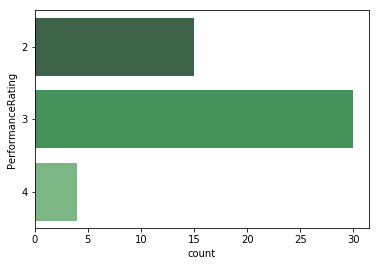

In [155]:
sb.countplot(y="PerformanceRating", data=Finance, palette="Greens_d");


# (ii) Performance Rating with respect to Age Group

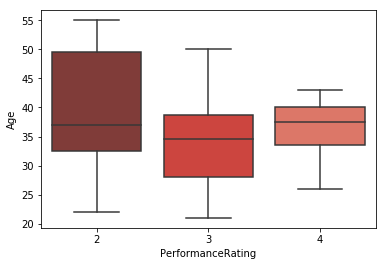

In [156]:
sb.boxplot(Finance['PerformanceRating'], Finance['Age'],palette="Reds_d")

# (iii) Performance based on Gender

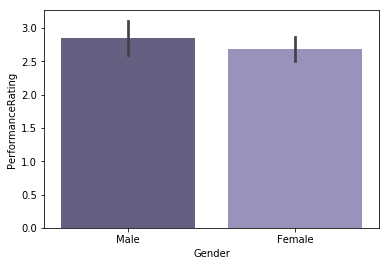

In [157]:
sb.barplot(Finance['Gender'], Finance['PerformanceRating'],palette="Purples_d")

# (iv) Performance According to the Experience Level

In [158]:
data = [
    {
        'x': Finance['TotalWorkExperienceInYears'],
        'y': Finance['PerformanceRating'],
        'name':'TotalWorkExperienceInYears',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x':Finance['ExperienceYearsAtThisCompany'],
        'y':Finance['PerformanceRating'],
        'name': 'ExperienceYearsAtThisCompany',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    },
    {
        'x': Finance['ExperienceYearsInCurrentRole'],
        'y': Finance['PerformanceRating'],
        'name':'ExperienceYearsInCurrentRole',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'h',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Number of Years',
        'zeroline': False,
    },
    'yaxis': {
        'title': 'Performance Rating ',
        'zeroline': False,
    },
    'boxmode': 'group',
    'title': 'Performance According to the Experience Level - Finance ',
}
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

# One hot encoding for categorial features

In [159]:
data = pd.read_csv('INX_Future.csv')
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [160]:
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical =data.columns.difference(categorical)

In [161]:
# Store the categorical data in a dataframe called attrition_cat
original_cat = data[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1)

In [162]:
original_cat = pd.get_dummies(original_cat)
original_cat.head(5)

Gender_Female  Gender_Male  EducationBackground_Human Resources  \
0              0            1                                    0   
1              0            1                                    0   
2              0            1                                    0   
3              0            1                                    1   
4              0            1                                    0   

   EducationBackground_Life Sciences  EducationBackground_Marketing  \
0                                  0                              1   
1                                  0                              1   
2                                  1                              0   
3                                  0                              0   
4                                  0                              1   

   EducationBackground_Medical  EducationBackground_Other  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   EducationBackground_Technical Degree  MaritalStatus_Divorced  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       1   
4                                     0                       0   

   MaritalStatus_Married  ...  EmpJobRole_Senior Manager R&D  \
0                      0  ...                              0   
1                      0  ...                              0   
2                      1  ...                              0   
3                      0  ...                              0   
4                      0  ...                              0   

   EmpJobRole_Technical Architect  EmpJobRole_Technical Lead  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   BusinessTravelFrequency_Non-Travel  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   BusinessTravelFrequency_Travel_Frequently  \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

   BusinessTravelFrequency_Travel_Rarely  OverTime_No  OverTime_Yes  \
0                                      1            1             0   
1                                      1            1             0   
2                                      0            0             1   
3                                      1            1             0   
4                                      1            1             0   

   Attrition_No  Attrition_Yes  
0             1              0  
1             1              0  
2             1              0  
3             1              0  
4             1              0  

[5 rows x 43 columns]

# Creating new features from Numerical data

In [163]:
# Store the numerical features to a dataframe attrition_num
original_num = data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating

In [164]:
# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)
original_final.head(5)

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0   32                10                  3                           4   
1   47                14                  4                           4   
2   40                 5                  4                           4   
3   41                10                  4                           2   
4   60                16                  4                           1   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0             55                  3            2                   4   
1             42                  3            2                   1   
2             48                  2            3                   1   
3             73                  2            5                   4   
4             84                  3            2                   1   

   EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  ...  \
0                        12                            4  ...   
1                        12                            4  ...   
2                        21                            3  ...   
3                        15                            2  ...   
4                        14                            4  ...   

   EmpJobRole_Senior Manager R&D  EmpJobRole_Technical Architect  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   EmpJobRole_Technical Lead  BusinessTravelFrequency_Non-Travel  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          0                                   0   

   BusinessTravelFrequency_Travel_Frequently  \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

   BusinessTravelFrequency_Travel_Rarely  OverTime_No  OverTime_Yes  \
0                                      1            1             0   
1                                      1            1             0   
2                                      0            0             1   
3                                      1            1             0   
4                                      1            1             0   

   Attrition_No  Attrition_Yes  
0             1              0  
1             1              0  
2             1              0  
3             1              0  
4             1              0  

[5 rows x 61 columns]

In [165]:
from sklearn.preprocessing import LabelEncoder,scale

In [166]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3  

[5 rows x 28 columns]

In [167]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

# 3. Implementing Machine Learning Models

 # Decision Tree with GridSearchCV

In [168]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss



In [169]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [170]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1


In [171]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)# Splitting into train and test for calculating the accuracy

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
classifier_rfg=RandomForestClassifier(random_state=50,n_estimators=500,n_jobs=3)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=3,
                                              oob_score=False, random_state=50,
                                    

In [173]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [174]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [175]:
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.93
              precision    recall  f1-score   support

           2       0.92      0.91      0.92        54
           3       0.95      0.95      0.95       219
           4       0.78      0.78      0.78        27

    accuracy                           0.93       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.93      0.93      0.93       300



# RandomForest with SMOTE

In [176]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=9)
X_smote,y_smote = smote.fit_sample(X_train,y_train)

In [177]:
from collections import Counter

In [178]:
print(Counter(y_train))
print(Counter(y_smote))

Counter({3: 655, 2: 140, 4: 105})
Counter({3: 655, 2: 655, 4: 655})


In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=90)

In [181]:
model = RandomForestClassifier(n_estimators=600,random_state=90,max_depth=18)

In [182]:
model.fit(X_smote,y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=90, verbose=0,
                       warm_start=False)

In [183]:
X_test.shape


(300, 9)

In [184]:
X_smote.shape

(1965, 9)

In [185]:
y_smote.shape

(1965,)

In [186]:
y_test.shape

(300,)

In [187]:
X_test.shape

(300, 9)

In [188]:
y_predict = model.predict(X_test)

In [189]:
accuracy_score(y_test,y_predict)

0.99

In [190]:
pd.crosstab(y_test,y_predict)

col_0               2    3   4
PerformanceRating             
2                  44    0   0
3                   1  221   1
4                   0    1  32

In [191]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        44
           3       1.00      0.99      0.99       223
           4       0.97      0.97      0.97        33

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



# XGBoost Classifier

In [192]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=70,learning_rate=0.1,n_estimators=150,gamma=0.1,n_jobs=1)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=70,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [193]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [194]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.95
              precision    recall  f1-score   support

           2       0.87      0.89      0.88        44
           3       0.96      0.97      0.97       223
           4       0.97      0.88      0.92        33

    accuracy                           0.95       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



# Artificial neural networks

In [195]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [196]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [197]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8233333333333334
              precision    recall  f1-score   support

           2       0.75      0.68      0.71        44
           3       0.92      0.85      0.88       223
           4       0.52      0.85      0.64        33

    accuracy                           0.82       300
   macro avg       0.73      0.79      0.75       300
weighted avg       0.85      0.82      0.83       300



In [198]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 30,  14,   0],
       [  8, 189,  26],
       [  2,   3,  28]], dtype=int64)

In [205]:
data.to_csv('INX_Future-Result.csv')

In [206]:
data

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    2              2              5   
1      47       1                    2              2              5   
2      40       1                    1              1              5   
3      41       1                    0              0              3   
4      60       1                    2              2              5   
5      27       1                    1              0              1   
6      50       1                    2              1              5   
7      28       0                    1              2              1   
8      36       0                    1              1              1   
9      38       0                    1              2              1   
10     44       1                    3              2              1   
11     47       0                    3              0              5   
12     30       1                    2              0              5   
13     29       1                    1              2              5   
14     42       1                    3              0              1   
15     34       0                    3              2              1   
16     39       0                    0              1              3   
17     56       1                    3              1              1   
18     40       0                    3              2              1   
19     27       0                    3              2              1   
20     29       1                    2              0              5   
21     53       1                    1              2              1   
22     35       0                    1              0              1   
23     32       1                    1              1              1   
24     34       0                    1              0              1   
25     52       1                    2              1              5   
26     33       1                    4              2              1   
27     25       0                    3              2              5   
28     45       1                    5              2              5   
29     23       1                    3              2              1   
...   ...     ...                  ...            ...            ...   
1170   38       0                    1              2              1   
1171   43       1                    3              0              1   
1172   48       0                    1              1              1   
1173   44       0                    1              2              3   
1174   34       0                    5              0              5   
1175   27       1                    2              0              5   
1176   21       1                    5              2              5   
1177   44       1                    4              1              1   
1178   22       1                    3              1              1   
1179   32       0                    1              1              1   
1180   30       0                    3              0              1   
1181   34       1                    1              1              1   
1182   26       0                    1              1              1   
1183   37       1                    4              1              1   
1184   29       0                    3              1              5   
1185   35       1                    1              2              1   
1186   54       1                    3              1              3   
1187   36       1                    3              0              1   
1188   20       1                    3              2              1   
1189   33       1                    1              2              1   
1190   23       1                    3              1              1   
1191   25       1                    1              1              5   
1192   38       0                    2              2              5   
1193   29       1                    1        